In [1]:
from qiskit.circuit import QuantumCircuit, Parameter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta_param = Parameter('θ')
phi_param = Parameter('φ')

In [3]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.rz(theta_param,0)
qc1.draw()

┌───┐┌───────┐
q: ┤ H ├┤ Rz(θ) ├
   └───┘└───────┘

In [4]:
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

In [5]:
def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

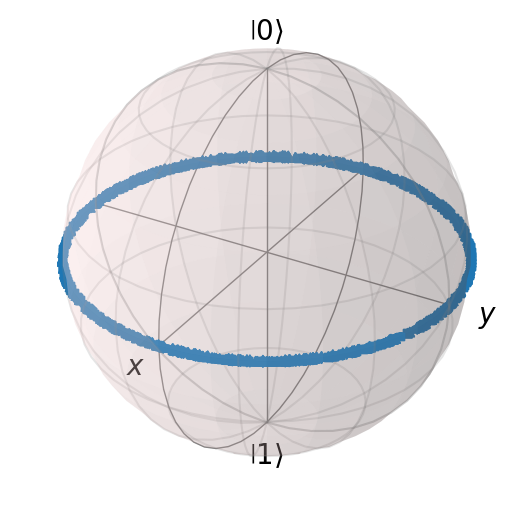

In [6]:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

b = Bloch()
b.point_color = ['tab:blue']
for i in range(num_param):    
    state=Statevector.from_instruction(qc1.bind_parameters({theta_param:theta[i]}))
    b.add_points(state_to_bloch(state))
b.show()

In [7]:
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.rz(theta_param,0)
qc2.rx(phi_param,0)
qc2.draw()

┌───┐┌───────┐┌───────┐
q: ┤ H ├┤ Rz(θ) ├┤ Rx(φ) ├
   └───┘└───────┘└───────┘

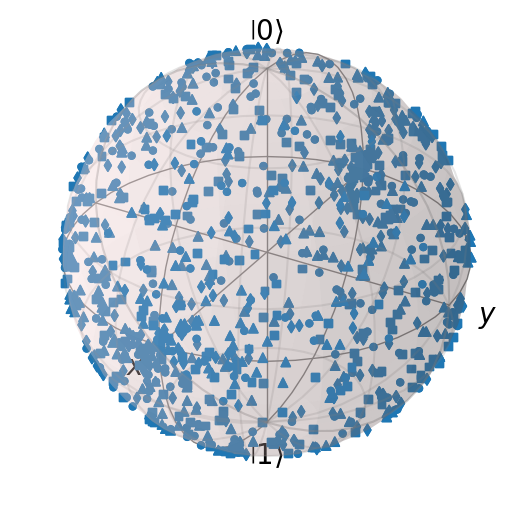

In [8]:
b = Bloch()
b.point_color = ['tab:blue']
for i in range(num_param):    
    state=Statevector.from_instruction(qc2.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b.add_points(state_to_bloch(state))
b.show()

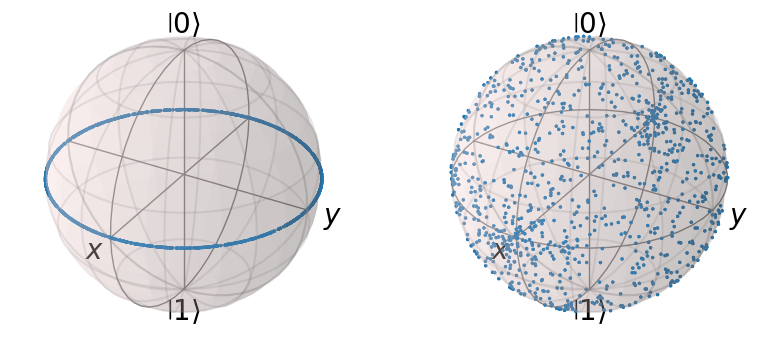

In [9]:
# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

for i in range(num_param):    
    state_1=Statevector.from_instruction(qc1.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc2.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

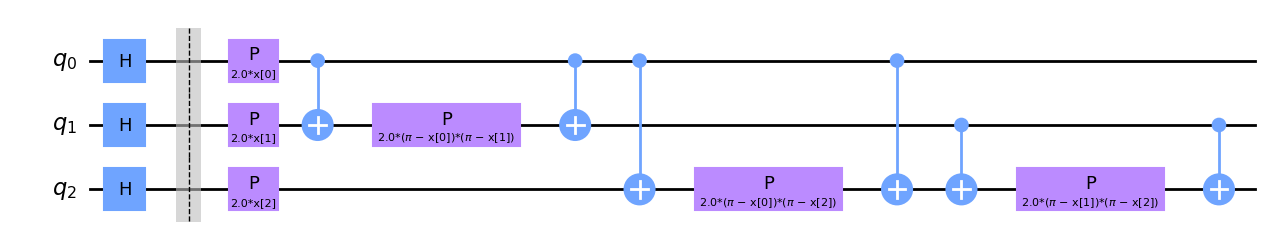

In [11]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw(output='mpl')

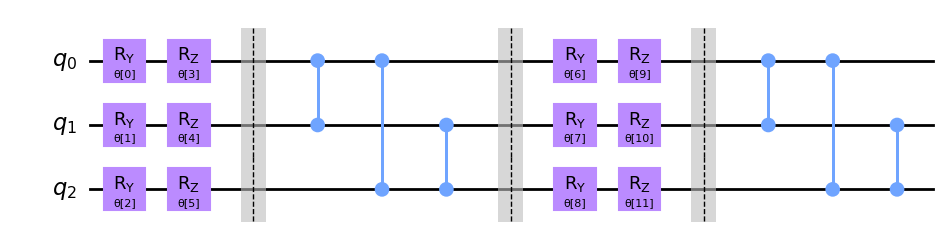

In [13]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.decompose().draw(output='mpl')

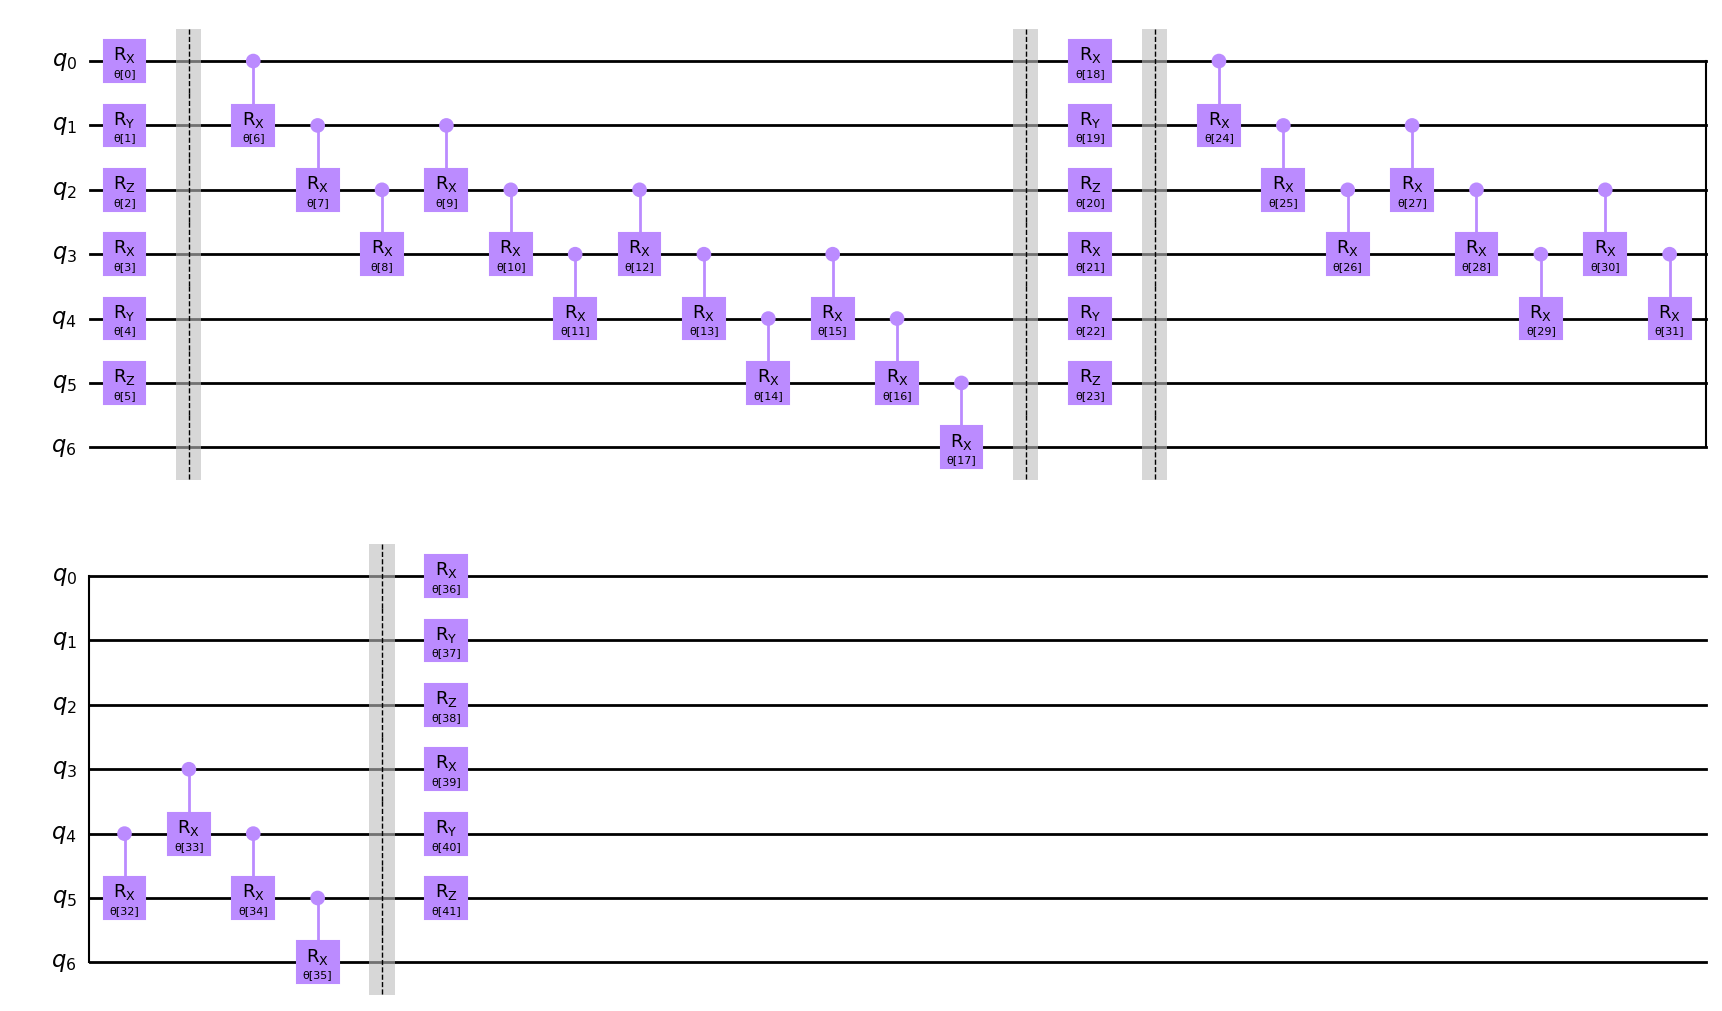

In [16]:
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import NLocal

# rotation block:
rot = QuantumCircuit(3)
rparams = ParameterVector('r', 3)
rot.rx(rparams[0], 0)
rot.ry(rparams[1], 1)
rot.rz(rparams[2], 2)

# entanglement block:
ent = QuantumCircuit(4)
eparams = ParameterVector('e', 3)
ent.crx(eparams[0], 0, 1)
ent.crx(eparams[1], 1, 2)
ent.crx(eparams[2], 2, 3)

qc_nlocal = NLocal(num_qubits=7, 
                   rotation_blocks=rot, 
                   entanglement_blocks=ent,
                   entanglement='linear',
                   reps=2,
                   insert_barriers=True)
qc_nlocal.decompose().draw(output='mpl')